# Hidalgo and Hausmann (2009) metrics
In this notebooks we compute the metrics (Level 1 and 2) proposed by Hidalgo and Hausmann (2009), and we test their significance.


In [1]:
import sys

sys.path.insert(0, "../")

from scripts.hid_haus import hid_hous
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw
import scripts.features_extraction as fe
import numpy as np	

## Compute the metrics

In [12]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../../dataset/large_adjacency_matrix.csv").values
data_onehot = pd.read_csv("../../dataset/large_one_hot_encoding.csv")

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]
level = 2
[kd, ks] = hid_hous(adjacency_matrix, level)

/Users/andreaalberti/Desktop/Public_Projects/financial-project/code/metrics_analysis/../scripts/hid_haus.py:45: RuntimeWarning: divide by zero encountered in divide
  b2 = 1.0 / k_s[:, 0]


In [11]:
# For level 1 
level=1
ks_list = ks[:,level-1].tolist()

x, y = fe.get_x_y(ks_list, data_onehot, store_path = f"../prediction_model/features/ks_level_{level}.npz")


# For level 2
level=2
ks_list = ks[:,level-1].tolist()

x, y = fe.get_x_y(ks_list, data_onehot, store_path = f"../prediction_model/features/ks_level_{level}.npz")

## First level metrics (degree) distribution 

Text(0, 0.5, 'Frequency (log scale)')

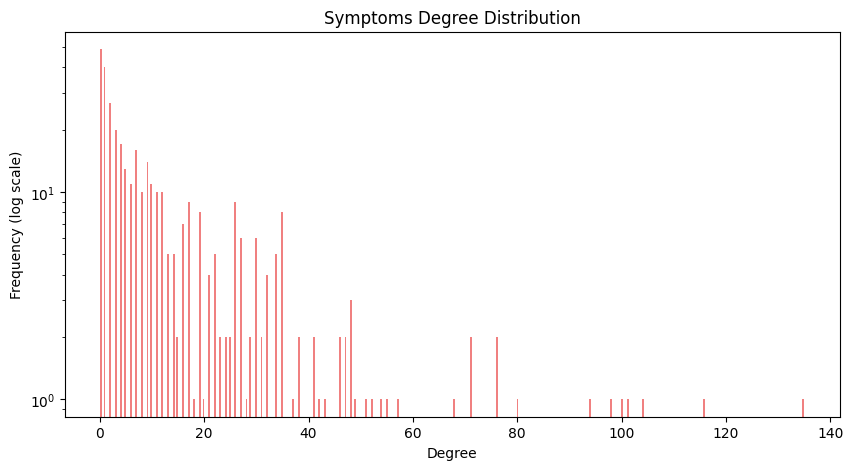

In [4]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(10,5))
plt.hist(ks[:,0], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")


Text(0, 0.5, 'Frequency (log scale)')

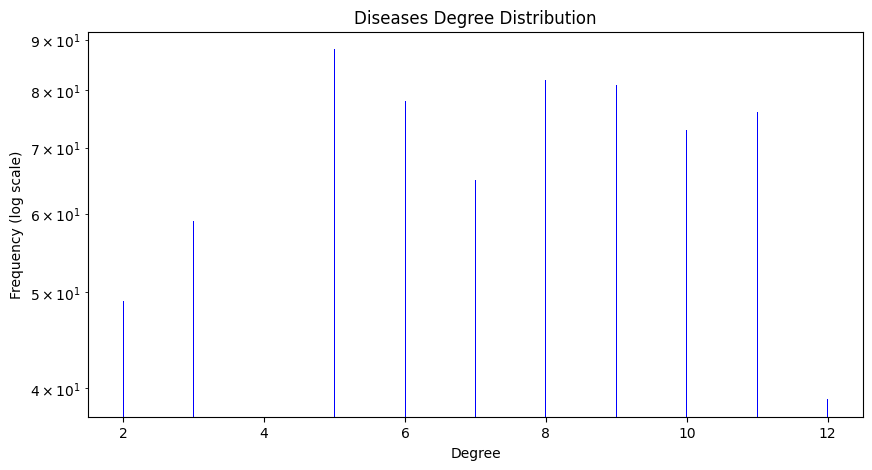

In [5]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(10, 5))
plt.hist(kd[:,0], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

## Second level metrics distribution

Text(0, 0.5, 'Frequency (log scale)')

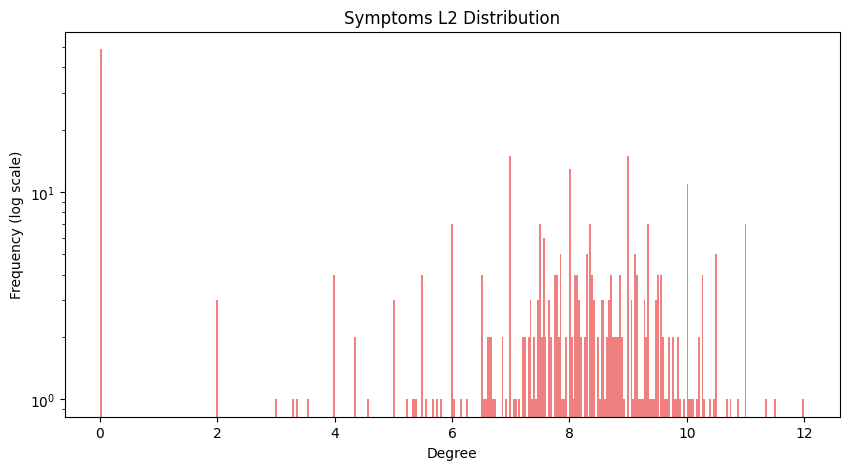

In [6]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(10, 5))
plt.hist(ks[:,1], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms L2 Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

Text(0, 0.5, 'Frequency (log scale)')

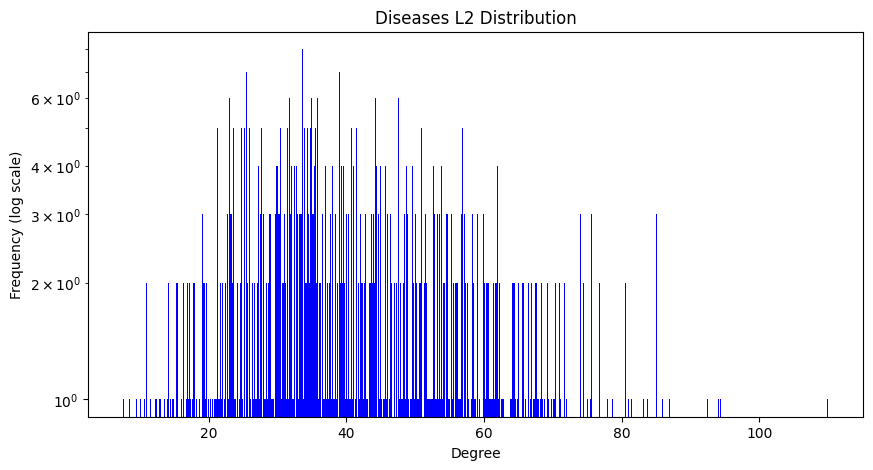

In [7]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(10, 5))
plt.hist(kd[:,1], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases L2 Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

## Power Law Test (WIP)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Power-law alpha parameter: 3.2485372329170223


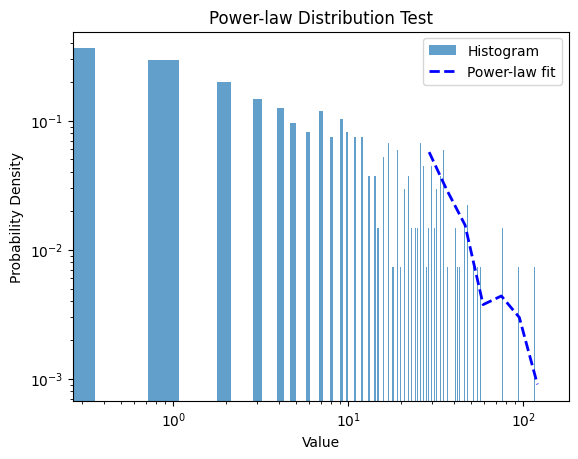

In [8]:
# Generate synthetic data following a power-law distribution
data = ks[:,0]  # You can replace this with your actual data

# Plot the histogram of the data
plt.hist(data, bins=ks.shape[0], density=True, alpha=0.7, label='Histogram')

# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Plot the power-law fit
fit.plot_pdf(color='b', linestyle='--', linewidth=2, label='Power-law fit')

# Display the parameters of the power-law fit
print(f"Power-law alpha parameter: {fit.alpha}")

# Show the plot
plt.title('Power-law Distribution Test')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## Assign to metrics values the corresponding symptom/disease name

<Axes: xlabel='Symptom'>

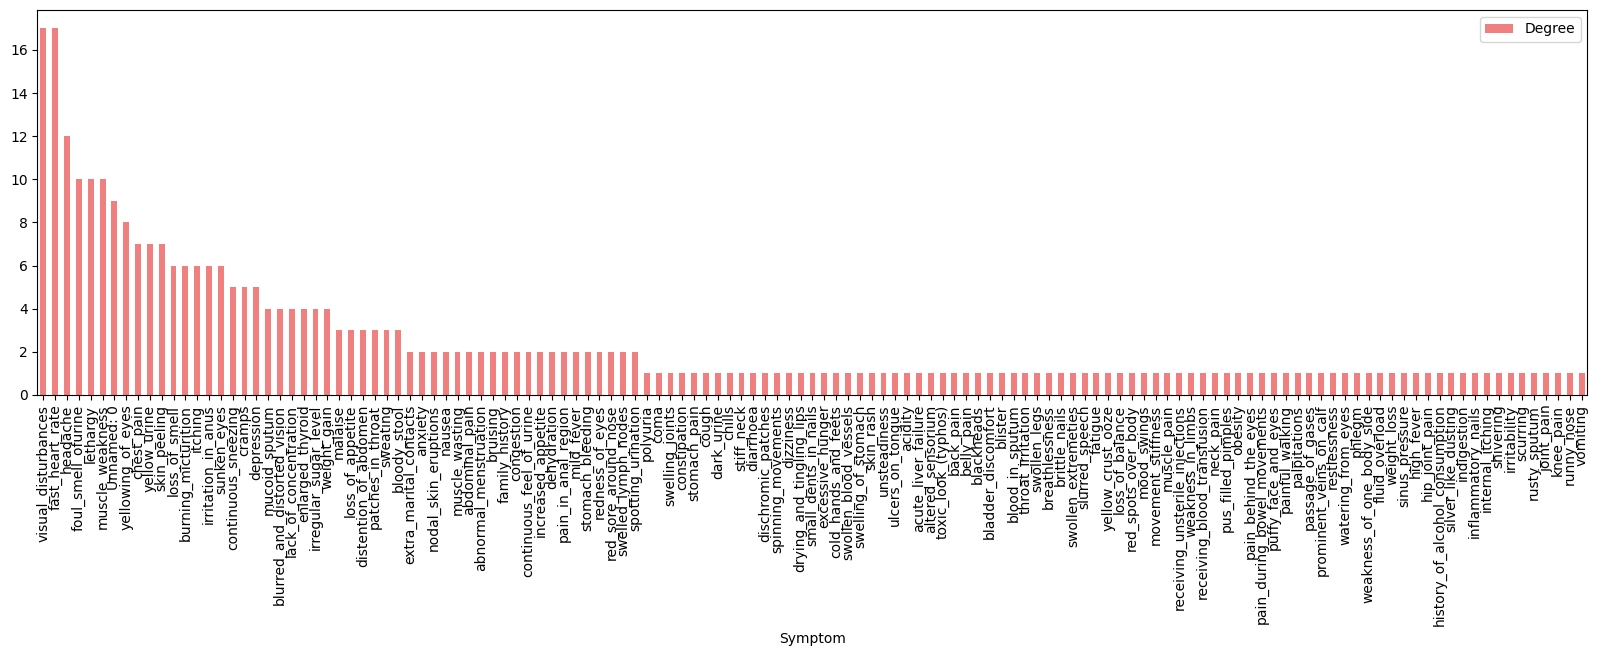

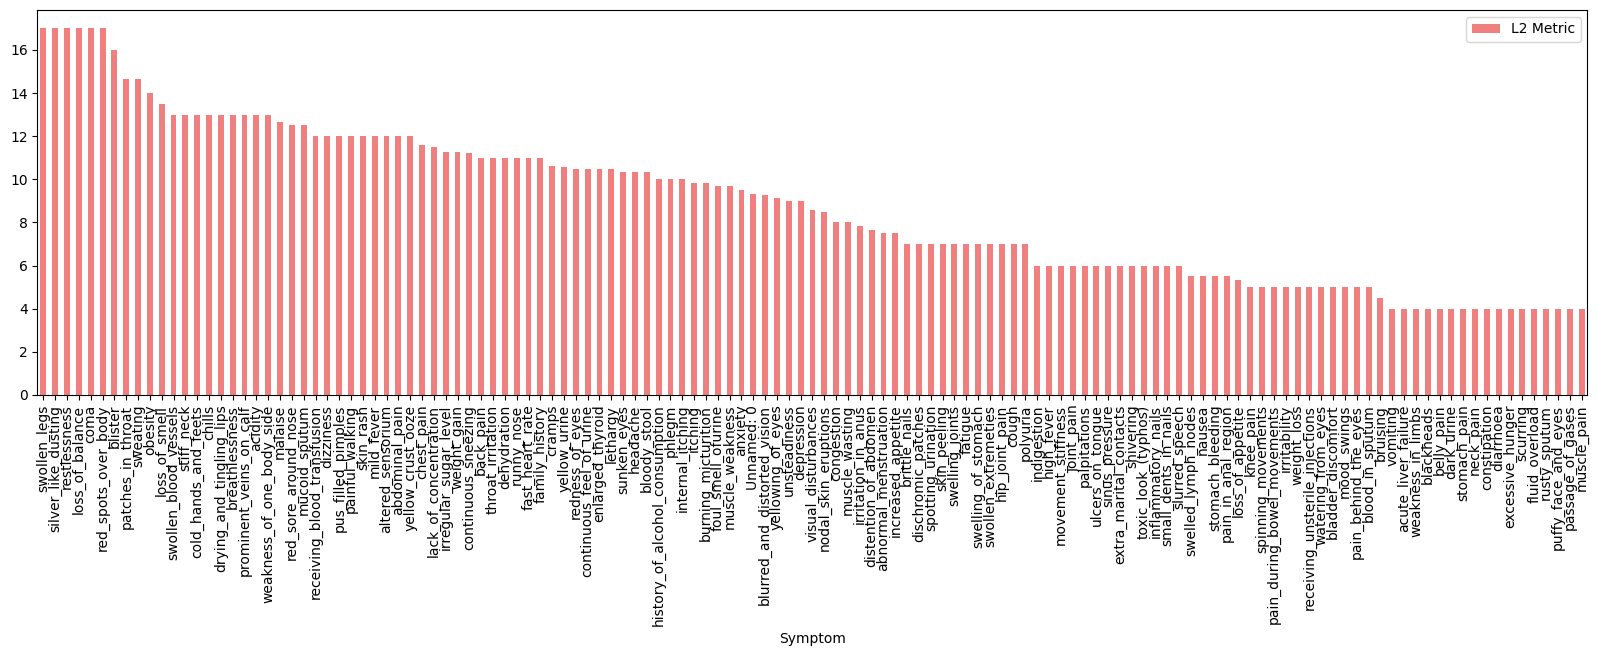

In [13]:
data_onehot = pd.read_csv("../../dataset/large_one_hot_encoding.csv")
names = data_onehot.columns.values.tolist()
names = names[:-1]

# Sort the symptoms by degree
sorted_index = np.argsort(ks[:,0])[::-1]
sorted_names = {names[i]: ks[i,0] for i in sorted_index}
sorted_names_L1 = pd.DataFrame(sorted_names.items(), columns=['Symptom', 'Degree'])
sorted_names_L1.plot.bar(x='Symptom', y='Degree', figsize=(20,5), color="lightcoral")

# Sort the symptoms by L2
sorted_index = np.argsort(ks[:,1])[::-1]
sorted_names = {names[i]: ks[i,1] for i in sorted_index}
sorted_names_L2 = pd.DataFrame(sorted_names.items(), columns=['Symptom', 'L2 Metric'])
sorted_names_L2.plot.bar(x='Symptom', y='L2 Metric', figsize=(20,5), color="lightcoral")